##### Todays task is delete the datapoints 70 and 76. Store the new data from cars_data. Build model and find the AIC, BIC, R-squared and adjusted r-squared.

## 1. import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error

### 2. Load your data

In [3]:
cars_data = pd.read_csv('Cars.csv')

In [4]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### 3. Perform initial analysis

In [5]:
cars_data.shape

(81, 5)

In [6]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [7]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

### 3.2 Perform Assumptions check

### Assumption 1: Normality Check
-  We should check for thr data distribution - Histogram

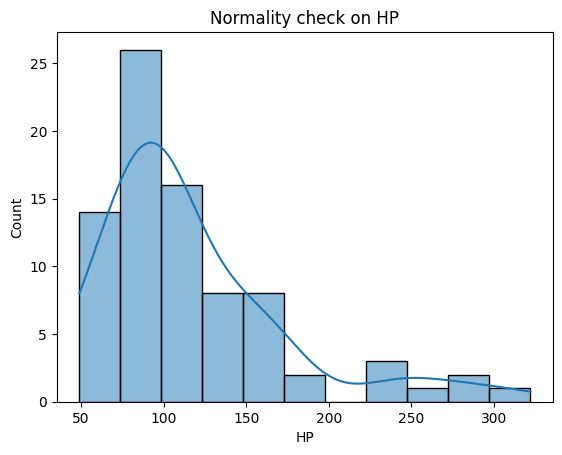

In [9]:
sns.histplot(data=cars_data['HP'],kde=True)
plt.title('Normality check on HP')
plt.show()

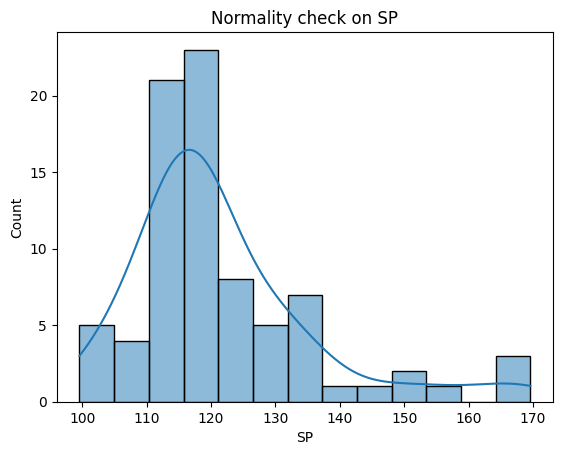

In [10]:
sns.histplot(data=cars_data["SP"], kde=True)
plt.title("Normality check on SP")
plt.show()

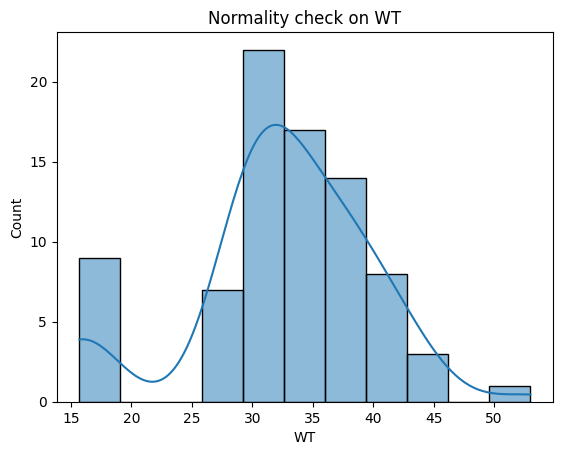

In [11]:
sns.histplot(data=cars_data["WT"], kde=True)
plt.title("Normality check on WT")
plt.show()

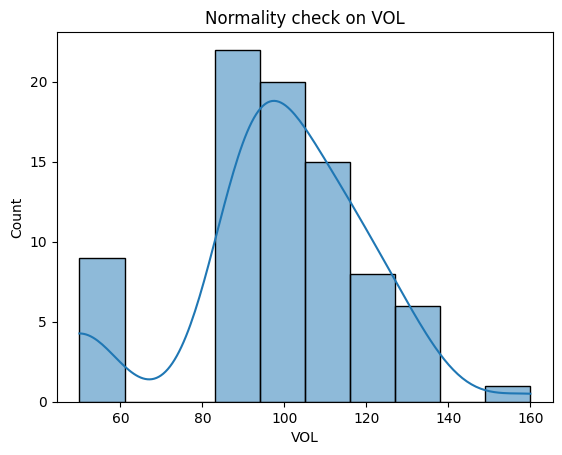

In [12]:
sns.histplot(data=cars_data["VOL"], kde=True)
plt.title("Normality check on VOL")
plt.show()

**-  Normality check is failed**

### Assumption 2: Linearity Check
-  The data has to be linear in nature

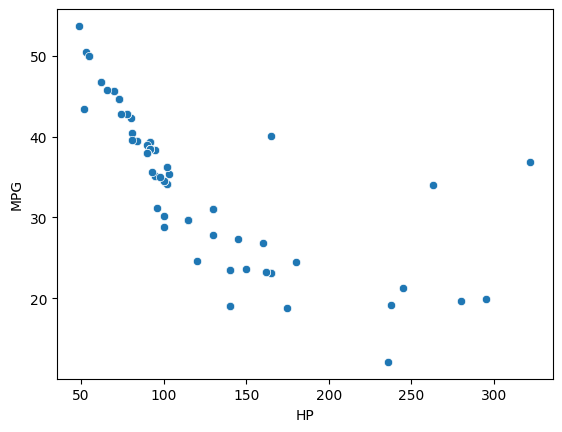

In [14]:
sns.scatterplot(data=cars_data, x='HP',y='MPG')
plt.show()

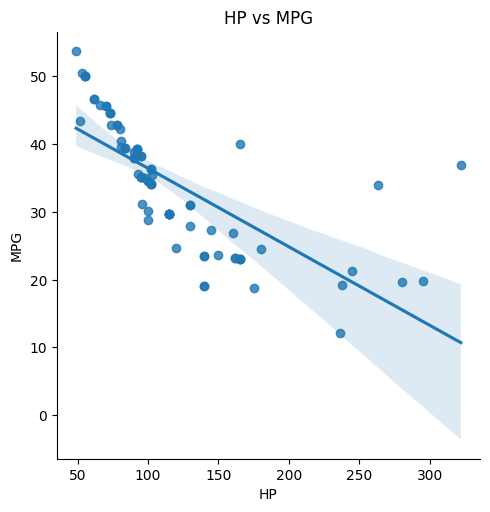

In [15]:
sns.lmplot(data=cars_data, x='HP',y='MPG')
plt.title("HP vs MPG")
plt.show()

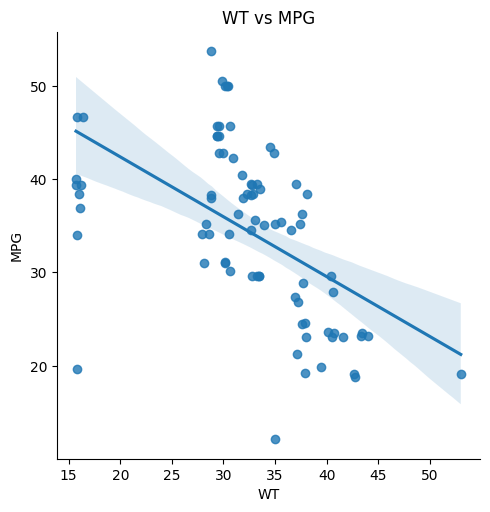

In [16]:
sns.lmplot(data=cars_data, x='WT',y='MPG')
plt.title("WT vs MPG")
plt.show()

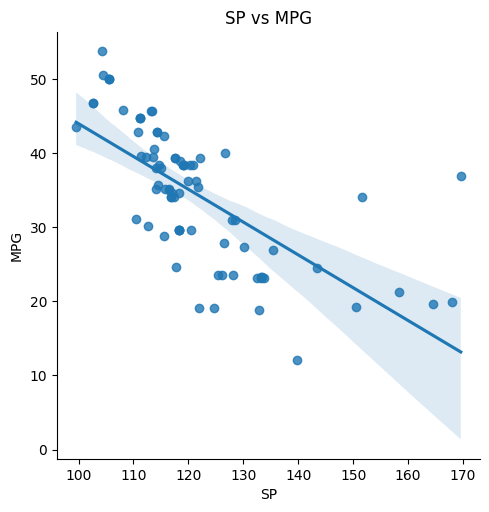

In [17]:
sns.lmplot(data=cars_data, x='SP',y='MPG')
plt.title("SP vs MPG")
plt.show()

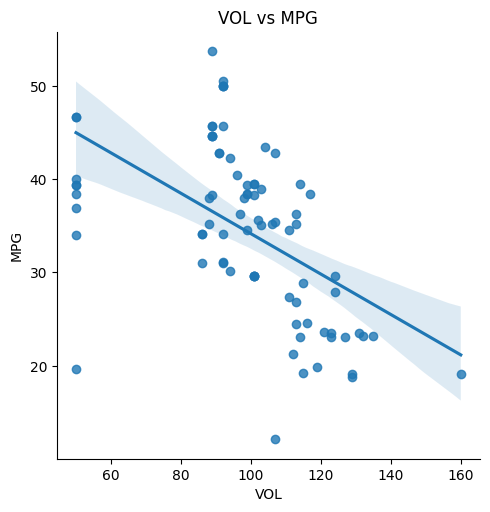

In [18]:
sns.lmplot(data=cars_data, x='VOL',y='MPG')
plt.title("VOL vs MPG")
plt.show()

**-  Linearity Test also failed**

### Asummptions 3 : No Multicolinearity
-  Understand the strength of the linear association or relationship between the features.Co-relation matrix

In [19]:
cars_corr=cars_data.corr()

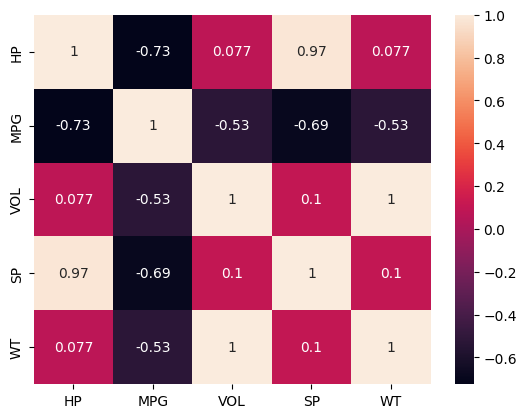

In [22]:
sns.heatmap(data=cars_corr,annot=True)
plt.show()

**- Multicollinearity Test is failed**

### Assumption 4: No Autoregression
- There is no time\date in the features.So, its not influenced by time

**Assumptions 5 and 6 - Homoscadacity and Zero residual mean will be done after at ethe end.**

### 4. Data preparation 
- No needed as everything is fine with our data

### 5. Model Building

In [24]:
x=cars_data.drop("MPG",axis=1)
y=cars_data[["MPG"]]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=123)

In [27]:
x_train

,HP,VOL,SP,WT
19,90,103,118.472936,33.516974
70,280,50,164.598513,15.823060
79,295,119,167.944460,39.423099
78,263,50,151.598513,15.769625
45,100,99,117.105055,32.621916
...,...,...,...,...
73,140,160,124.715241,52.997752
47,98,103,116.472936,33.910056
57,115,101,118.288996,32.734518
17,92,50,117.598513,16.194122


In [28]:
y_train

,MPG
19,38.901834
70,19.678507
79,19.833733
78,34.000000
45,34.561499
...,...
73,19.086341
47,35.052330
57,29.629936
17,39.354094


In [29]:
x_test

,HP,VOL,SP,WT
71,162,135,133.415985,44.013139
76,322,50,169.598513,16.132947
4,53,92,104.461264,29.889149
80,236,107,139.840817,34.948615
29,103,107,121.840817,35.549360
64,150,121,128.128401,40.159482
24,95,89,119.185353,28.781728
37,102,86,116.909442,27.879915
74,140,129,121.864163,42.618698
31,84,101,112.288996,33.234361


In [30]:
y_test

,MPG
71,23.203569
76,36.900000
4,50.504232
80,12.101263
29,35.404192
64,23.605158
24,38.310606
37,34.070668
74,19.086341
31,39.431235


### 6. Model Training

In [31]:
linear_model=LinearRegression()

In [32]:
linear_model

LinearRegression()

In [33]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [34]:
linear_model.coef_

array([[-0.21758452, -0.24761203,  0.37103505,  0.27307067]])

In [35]:
linear_model.intercept_

array([30.2032908])

### 7. Model Testing

In [36]:
y_trained=linear_model.predict(x_test)

In [37]:
y_trained

array([[23.04767717],
       [15.09290051],
       [42.81164374],
       [13.7881422 ],
       [36.21229846],
       [26.11106049],
       [39.57667903],
       [37.7057223 ],
       [24.6532975 ],
       [37.6558578 ],
       [46.86738801],
       [36.18365415],
       [40.87280892],
       [18.03994951],
       [33.13704253],
       [33.18444922],
       [39.73657572]])

In [ ]:
mean_squared_error(y_train,y_trained)

In [ ]:
mean_squared_error(y_test,y_tested)

### 8. Model Evalution

In [ ]:
error = y-y_pred

In [ ]:
error

In [ ]:
error_flattened=error.values.flatten()

In [ ]:
#Choose mean_squared_error when you have no outliers
#Choose mean_absolute_error when you have outliers.

### Assumption 5: Homoscadascity

In [ ]:
#Plot between error and features

In [ ]:
sns.scatterplot(data= cars_data, x='HP',y=error_flattened)

In [ ]:
plt.scatter(x = cars_data['HP'],y = error)
plt.xlabel('HP')
plt.ylabel('Error')
plt.title('Homoscadasticity Test between HP and Error')
plt.show()

In [ ]:
plt.scatter(x = cars_data['VOL'],y = error)
plt.xlabel('VOL')
plt.ylabel('Error')
plt.title('Homoscadasticity Test between VOL and Error')
plt.show()

In [ ]:
plt.scatter(x = cars_data['SP'],y = error)
plt.xlabel('SP')
plt.ylabel('Error')
plt.title('Homoscadasticity Test between SP and Error')
plt.show()

In [ ]:
plt.scatter(x = cars_data['WT'],y = error)
plt.xlabel('WT')
plt.ylabel('Error')
plt.title('Homoscadasticity Test between WT and Error')
plt.show()

In [ ]:
#Homoscedasticity test failed

### Assumption 6: Zero Residual

In [ ]:
plt.scatter(x = y,y = y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual O/p Vs Predicted O/p')
plt.show()

**-Zero Residual Test is failed**

## Use statsmodels to build Linear Regression

## NOTE:
Linear Regression can be built using 2 libraries:
1. sklearn
2. statsmodels

In [40]:
import statsmodels.formula.api as smf

In [41]:
model_ols=smf.ols(formula= "MPG~HP+VOL+SP+WT",data=cars_data).fit()

In [42]:
model_ols.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

### AIC
- The Akaike information criterion (AIC) is a metric used to compare the fit of different regression models. 
- The lower the AIC, the better the model fit

### BIC
- The Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models.
- A lower BIC indicates a better balance between model fit and complexity

In [44]:
model_1=smf.ols(formula= "MPG~HP",data=cars_data).fit()

In [45]:
print("AIC value for model 1 is",     model_1.aic.round(2))
print("BIC value for model 1 is",     model_1.bic.round(2))
print("R-sqaured value fpr model 1 is", model_1.rsquared.round(4))# Contribution of Input features. The highest value, you can get is 1
print("Adjusted R-sqaured value fpr model 1 is", model_1.rsquared_adj.round(4))

AIC value for model 1 is 530.75
BIC value for model 1 is 535.53
R-sqaured value fpr model 1 is 0.5257
Adjusted R-sqaured value fpr model 1 is 0.5197


In [46]:
model_2=smf.ols(formula= "MPG~HP+VOL",data=cars_data).fit()

In [47]:
print("AIC value for model 2 is", model_2.aic)
print("BIC value for model 2 is", model_2.bic)
print("R-sqaured value fpr model 2 is", model_2.rsquared.round(4))
print("Adjusted R-sqaured value for model 2 is", model_2.rsquared_adj.round(4))

AIC value for model 2 is 480.6569237052377
BIC value for model 2 is 487.84027116925506
R-sqaured value fpr model 2 is 0.7507
Adjusted R-sqaured value for model 2 is 0.7443


In [48]:
model_3=smf.ols(formula= "MPG~HP+VOL+SP",data=cars_data).fit()

In [49]:
print("AIC value for model 3 is", model_3.aic)
print("BIC value for model 3 is", model_3.bic)
print("R-sqaured value fpr model 3 is", model_3.rsquared.round(4))
print("Adjusted R-sqaured value for model 3 is", model_3.rsquared_adj.round(4))

AIC value for model 3 is 475.9875158854609
BIC value for model 3 is 485.56531250415065
R-sqaured value fpr model 3 is 0.7704
Adjusted R-sqaured value for model 3 is 0.7614


In [50]:
model_4=smf.ols(formula= "MPG~HP+VOL+SP+WT",data=cars_data).fit()

In [51]:
print("AIC value for model 4 is", model_4.aic)
print("BIC value for model 4 is", model_4.bic)
print("R-sqaured value fpr model 4 is", model_4.rsquared.round(4))
print("Adjusted R-sqaured value for model 4 is", model_4.rsquared_adj.round(4))

AIC value for model 4 is 477.9279049354879
BIC value for model 4 is 489.9001507088501
R-sqaured value fpr model 4 is 0.7705
Adjusted R-sqaured value for model 4 is 0.7585


### r-squared and adjusted r-squared

##### r-squared- It speaks about the variance in the dependent variable that can be explained by the independent variable.

In [52]:
y_pred_model_3 = model_3.predict(x)

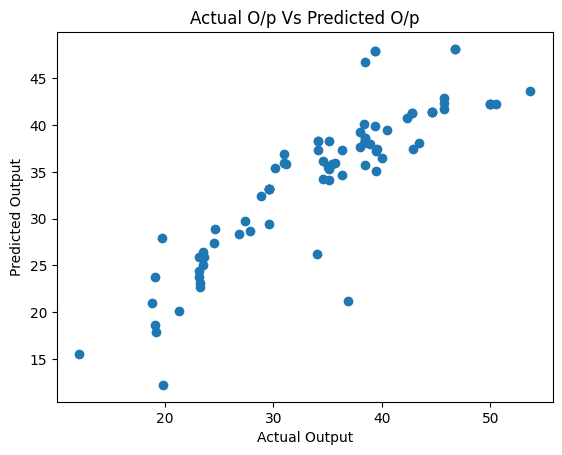

In [53]:
plt.scatter(x = y,y = y_pred_model_3)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual O/p Vs Predicted O/p')
plt.show()

### MODEL OPTIMIZATION TECHNIQUES¶

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding

In [54]:
cars_data_2 = cars_data.copy()

In [55]:
cars_data_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [56]:
import numpy as np

In [58]:
cars_data_2['log_HP'] = np.log(cars_data_2['HP'])
cars_data_2['log_SP'] = np.log(cars_data_2['SP'])
cars_data_2['log_VOL'] = np.log(cars_data_2['VOL'])
cars_data_2['log_WT'] = np.log(cars_data_2['WT'])

In [59]:
cars_data_2

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


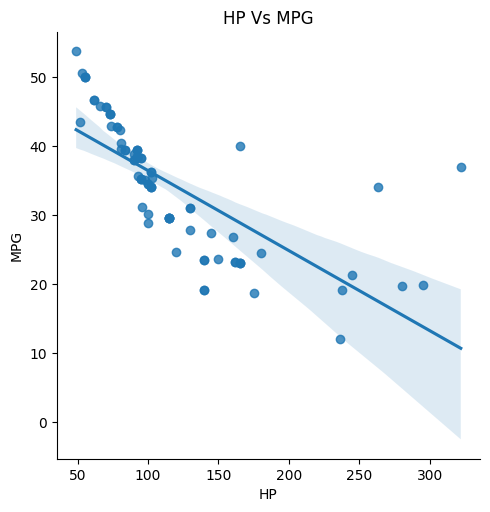

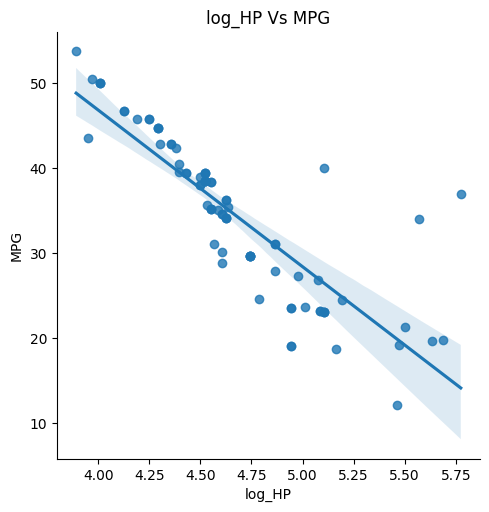

In [60]:
sns.lmplot(x='HP',y='MPG',data = cars_data_2)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_2)
plt.title('log_HP Vs MPG')
plt.show()

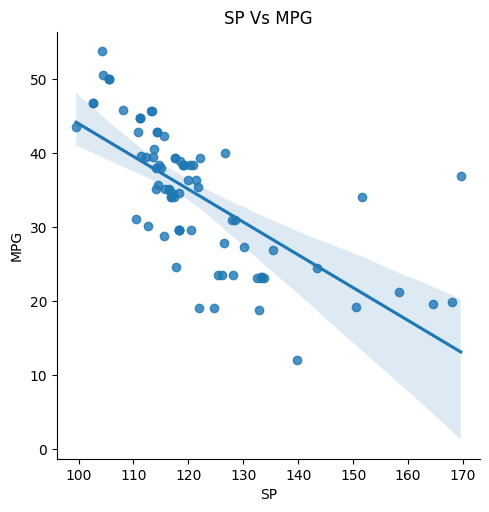

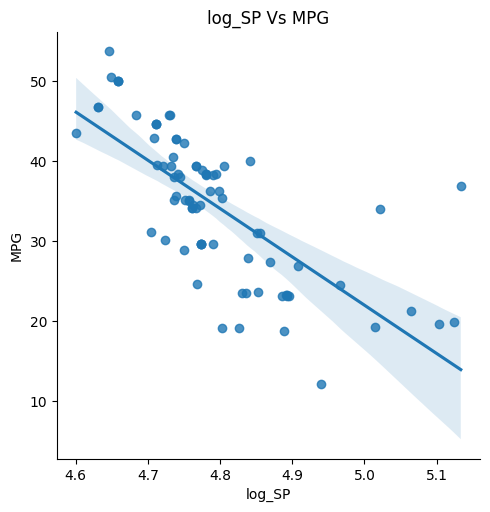

In [61]:
sns.lmplot(x='SP',y='MPG',data = cars_data_2)
plt.title('SP Vs MPG')
plt.show()

sns.lmplot(x='log_SP',y='MPG',data = cars_data_2)
plt.title('log_SP Vs MPG')
plt.show()

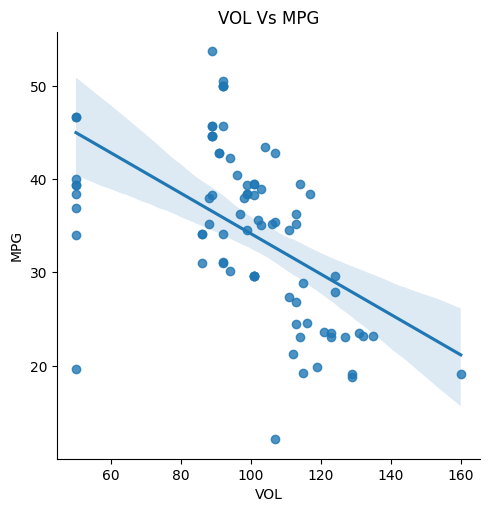

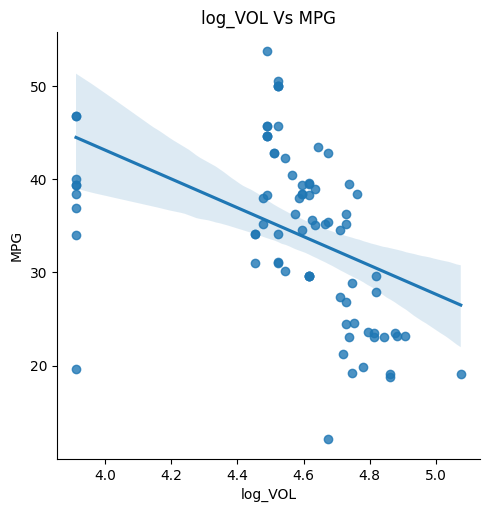

In [62]:
sns.lmplot(x='VOL',y='MPG',data = cars_data_2)
plt.title('VOL Vs MPG')
plt.show()

sns.lmplot(x='log_VOL',y='MPG',data = cars_data_2)
plt.title('log_VOL Vs MPG')
plt.show()

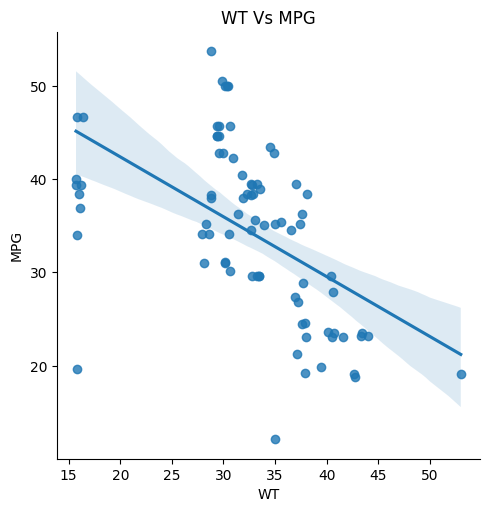

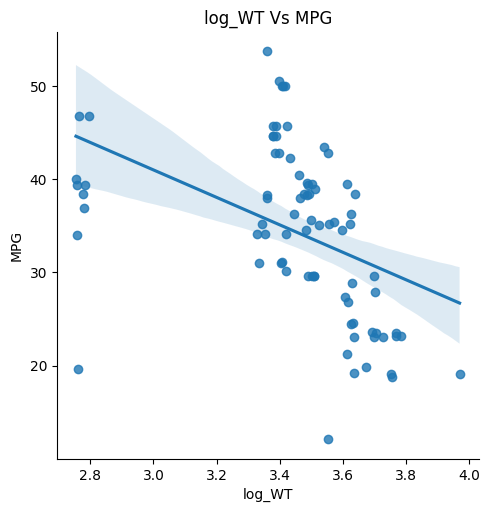

In [63]:
sns.lmplot(x='WT',y='MPG',data = cars_data_2)
plt.title('WT Vs MPG')
plt.show()

sns.lmplot(x='log_WT',y='MPG',data = cars_data_2)
plt.title('log_WT Vs MPG')
plt.show()

### Results after Optimizing Model

In [64]:
model_6 = smf.ols(formula = 'MPG~ log_VOL', data = cars_data_2).fit()
print('AIC Value   :',model_6.aic)
print('BIC Value   :',model_6.bic)
print('R Squared   :',model_6.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_6.rsquared_adj.round(4))

AIC Value   : 573.0814921857461
BIC Value   : 577.870390495091
R Squared   : 0.2
Adj R Square: 0.1899


In [65]:
model_7 = smf.ols(formula = 'MPG~log_VOL + log_WT', data = cars_data_2).fit()
print('AIC Value   :',model_7.aic)
print('BIC Value   :',model_7.bic)
print('R Squared   :',model_7.rsquared.round(4))
print('Adj R Square:',model_7.rsquared_adj.round(4))

AIC Value   : 571.9438936488339
BIC Value   : 579.1272411128512
R Squared   : 0.2304
Adj R Square: 0.2107


In [66]:
model_8 = smf.ols(formula = 'MPG~ log_VOL + log_SP', data = cars_data_2).fit()
print('AIC Value   :',model_8.aic)
print('BIC Value   :',model_8.bic)
print('R Squared   :',model_8.rsquared.round(4))
print('Adj R Square:',model_8.rsquared_adj.round(4))

AIC Value   : 500.84478610558153
BIC Value   : 508.0281335695988
R Squared   : 0.6801
Adj R Square: 0.6719


In [67]:
model_9 = smf.ols(formula = 'MPG~ log_VOL + log_SP + log_HP', data = cars_data_2).fit()
print('AIC Value   :',model_9.aic)
print('BIC Value   :',model_9.bic)
print('R Squared   :',model_9.rsquared.round(4))
print('Adj R Square:',model_9.rsquared_adj.round(4))

AIC Value   : 399.10349401913345
BIC Value   : 408.6812906378232
R Squared   : 0.9111
Adj R Square: 0.9077


In [68]:
model_10 = smf.ols(formula = 'MPG~ log_VOL + log_SP + log_HP + log_WT', data = cars_data_2).fit()
print('AIC Value   :',model_10.aic)
print('BIC Value   :',model_10.bic)
print('R Squared   :',model_10.rsquared.round(4))
print('Adj R Square:',model_10.rsquared_adj.round(4))

AIC Value   : 400.5013350503874
BIC Value   : 412.4735808237496
R Squared   : 0.9118
Adj R Square: 0.9071


In [ ]:
## Model Prediction

In [69]:
y_pred_model_8 = model_9.predict(cars_data_2)

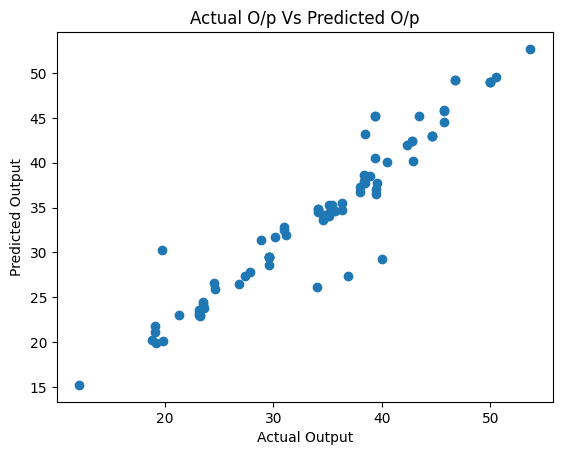

In [70]:
plt.scatter(x = y,y = y_pred_model_8)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual O/p Vs Predicted O/p')
plt.show()

### Model Optimization Technique 2

### Detecting Influencers/Outliers

1. Cooks Distance
2. High Influence Points

### 1. Cooks Distance
* Cook’s distance, is used in Regression Analysis to find **influential outliers** in a set of independent variables.
* In other words, it’s a way to identify points that negatively affect your regression model.
* The measurement is a combination of each observation’s **leverage and residual values**.
* T**he higher the leverage and residuals, the higher the Cook’s distance.**
* Several interpretations for Cook’s distance exist. There isn’t a universally accepted rule for cut off points.
* If you have a **lot of points with large Cook's Distance values**, that could indicate a problem with your regression model in general.

Reference: https://www.statisticshowto.com/cooks-distance/

In [71]:
model_influence=model_9.get_influence()

In [72]:
c,_=model_influence.cooks_distance

In [73]:
c

array([3.40987125e-03, 2.23408703e-03, 2.23408703e-03, 1.77985502e-06,
       1.79486181e-03, 7.64695598e-05, 2.23408703e-03, 3.19265706e-02,
       3.19265706e-02, 7.99487571e-05, 2.44665515e-03, 1.19735589e-01,
       2.13272656e-03, 2.44665515e-03, 1.44838258e-03, 2.44665515e-03,
       1.03203952e-04, 1.19735589e-01, 1.03203952e-04, 1.30253749e-04,
       1.41649274e-05, 6.51265138e-03, 1.29286512e-04, 1.01394529e-04,
       5.14819946e-05, 8.93020535e-02, 6.85709760e-04, 1.41649274e-05,
       5.66794132e-03, 1.50386508e-05, 6.49382140e-03, 3.54581546e-03,
       2.77708017e-04, 1.90090447e-03, 2.22732873e-03, 7.44988994e-04,
       2.47403353e-04, 4.32180481e-04, 4.32180481e-04, 1.21316892e-03,
       7.63813854e-04, 3.72410329e-04, 8.16200351e-05, 2.44091959e-05,
       6.47854742e-04, 9.73561619e-05, 5.57764358e-04, 5.99712527e-04,
       2.12897923e-03, 1.98013115e-05, 1.98013115e-05, 1.98013115e-05,
       1.08708219e-03, 1.03438056e-02, 1.08946217e-04, 9.85957728e-07,
      

In [74]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


<StemContainer object of 3 artists>

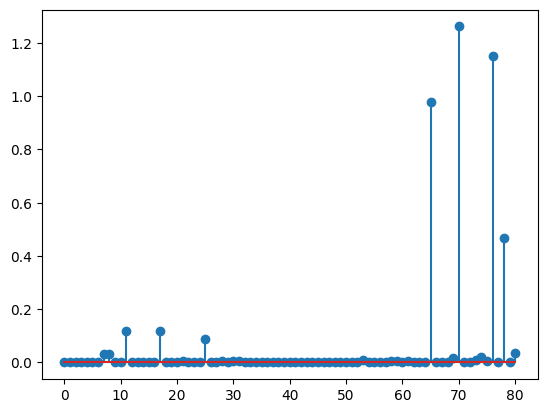

In [75]:
plt.stem(np.arange(len(cars_data)), np.round(c, 3))

In [76]:
np.argmax(c),np.max(c)

(70, 1.2620875804269107)

### High influence plots

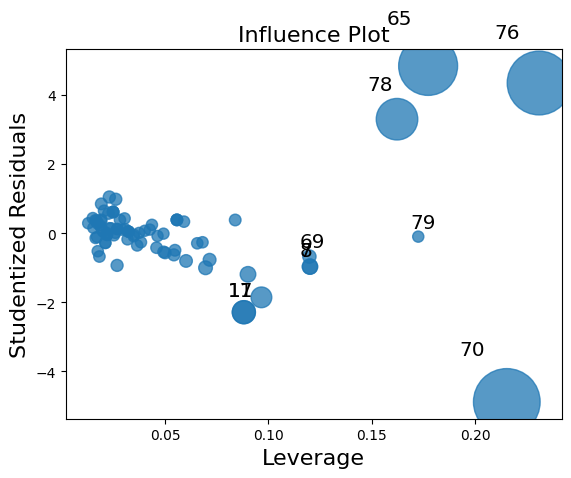

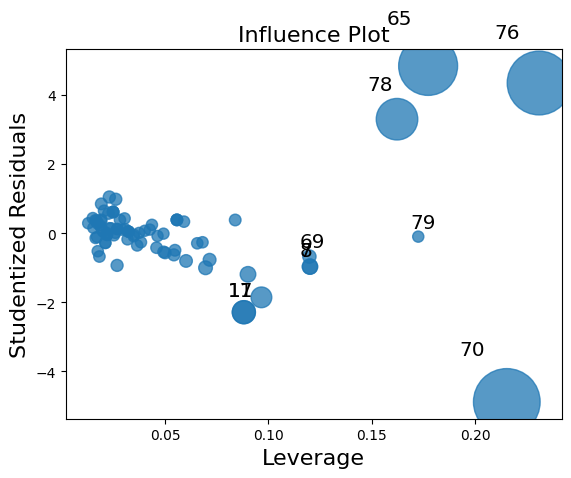

In [78]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_9)

In [ ]:
# Todays task is delete the datapoints 70 and 76. Store the new data from cars_data. Build model and find the AIC, BIC, R-squared and adjusted r-squared.

In [79]:
cars_data2=cars_data.copy()

In [81]:
cars_data_2=cars_data2.drop(cars_data2.index[[70,76]],axis=0).reset_index()

In [82]:
cars_data_2

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [83]:
cars_data_2.drop(['index'],axis=1)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099
